In [1]:
!pip install seaborn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import keras 
from keras.layers  import Dense,Flatten
from  sklearn.metrics import*

In [3]:
df = pd.read_csv('Churn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
cols = list(set(df.columns))
cols

['Tenure',
 'CreditScore',
 'Exited',
 'HasCrCard',
 'Balance',
 'NumOfProducts',
 'CustomerId',
 'IsActiveMember',
 'Surname',
 'EstimatedSalary',
 'Age',
 'Gender',
 'RowNumber',
 'Geography']

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#EDA 
#Univariate Analysis -split your features into categorcal and numerical and then univariate as well as any insight that you can find 
#Bivariate Analysis - correlation between different values 
##Feautres Engineering

In [12]:
cols

['Tenure',
 'CreditScore',
 'Exited',
 'HasCrCard',
 'Balance',
 'NumOfProducts',
 'CustomerId',
 'IsActiveMember',
 'Surname',
 'EstimatedSalary',
 'Age',
 'Gender',
 'RowNumber',
 'Geography']

In [13]:
cols.remove('CustomerId')
cols.remove('RowNumber')
cols.remove('Surname')

In [14]:
cols

['Tenure',
 'CreditScore',
 'Exited',
 'HasCrCard',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'EstimatedSalary',
 'Age',
 'Gender',
 'Geography']

In [19]:
cat_cols = ['NumOfProducts','IsActiveMember','HasCrCard','Gender','Geography','Tenure'
]

In [20]:
num_cols = list(set(cols)-set(cat_cols))

In [21]:
num_cols

['CreditScore', 'Exited', 'EstimatedSalary', 'Age', 'Balance']

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


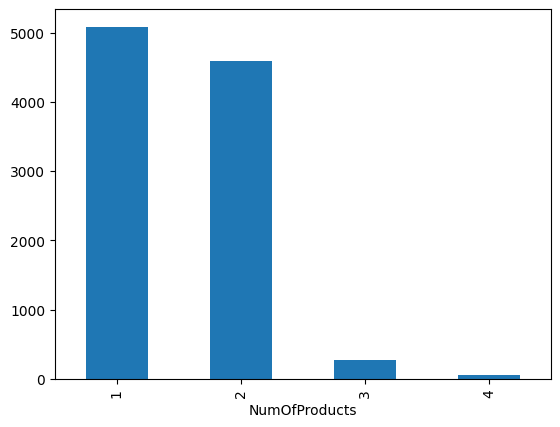

************************************************************
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


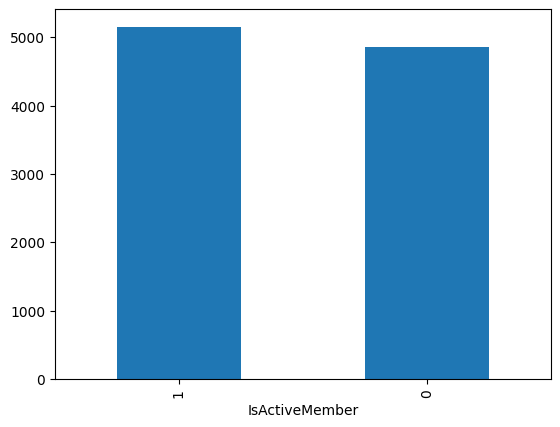

************************************************************
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


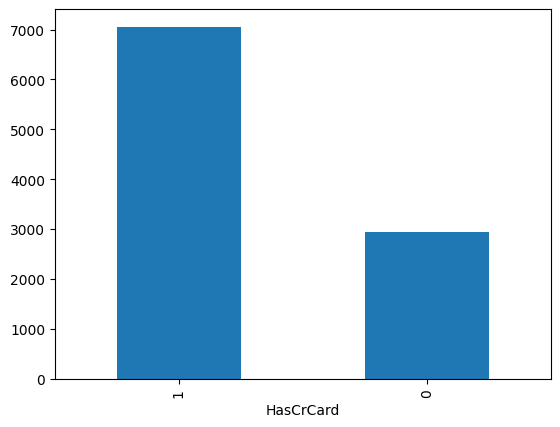

************************************************************
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


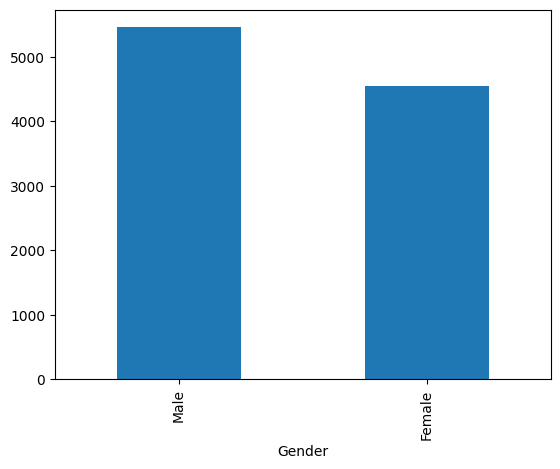

************************************************************
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


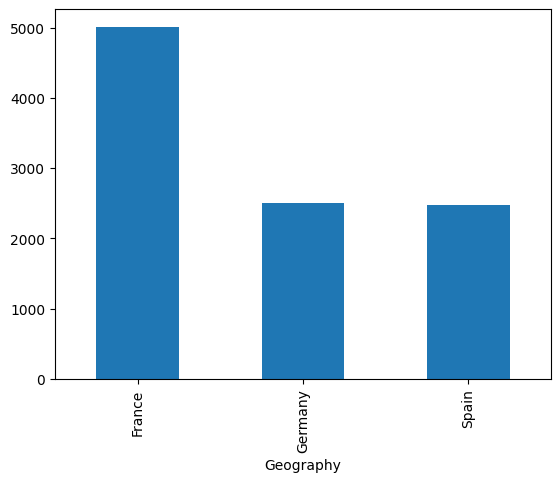

************************************************************
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


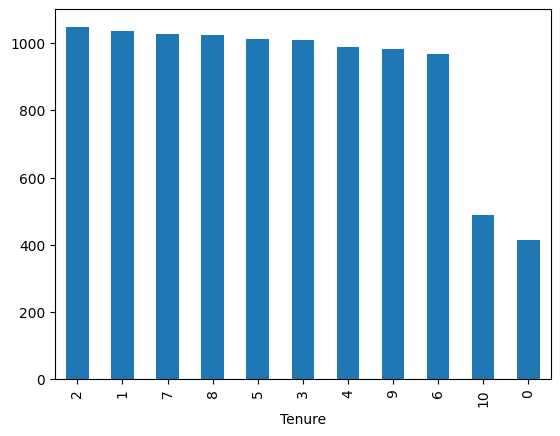

************************************************************


In [22]:
for i in cat_cols:
 print(df[i].value_counts())
 print(df[i].value_counts(normalize=True)*100)
 print(df[i].value_counts().plot.bar())
 plt.show()
 print("*"*60)

In [23]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname                str
CreditScore          int64
Geography              str
Gender                 str
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

CreditScore
Axes(0.125,0.11;0.775x0.77)


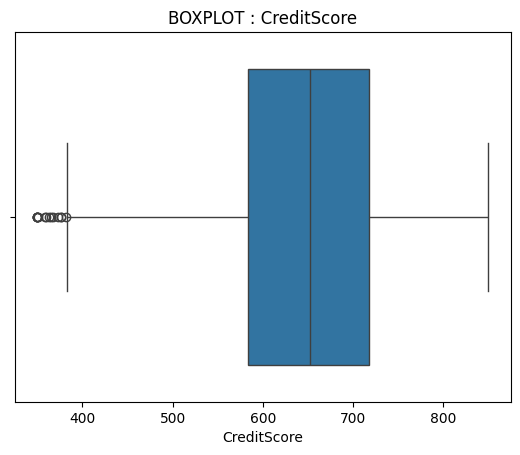

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
        655.]), array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]), <BarContainer object of 10 artists>)
Distribution of CreditScore


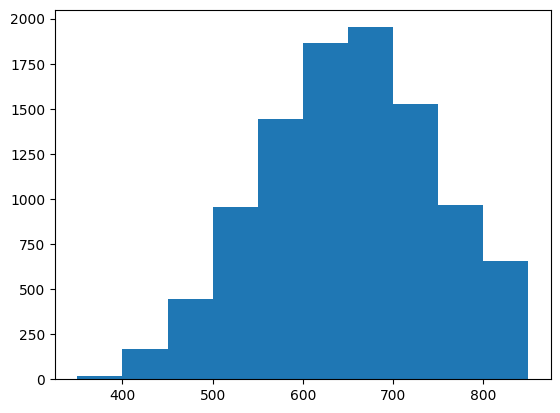

************************************************************
Exited
Axes(0.125,0.11;0.775x0.77)


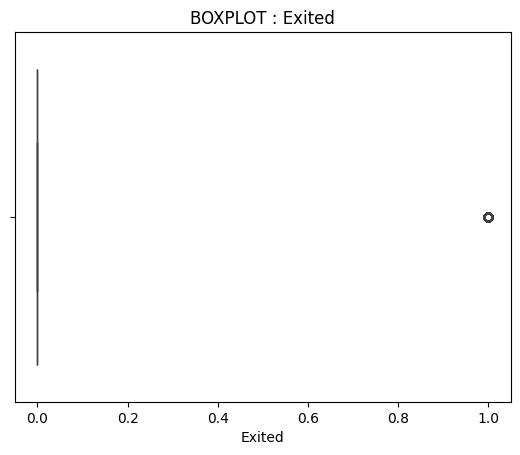

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       2037.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)
Distribution of Exited


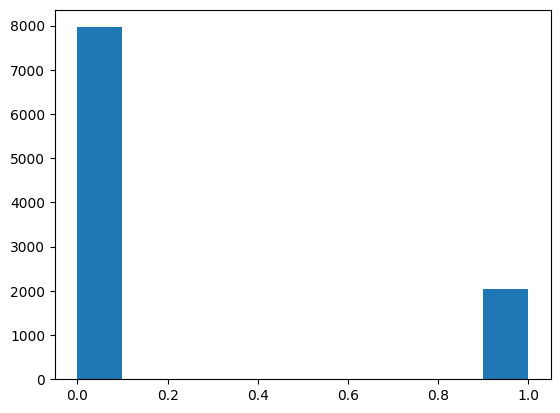

************************************************************
EstimatedSalary
Axes(0.125,0.11;0.775x0.77)


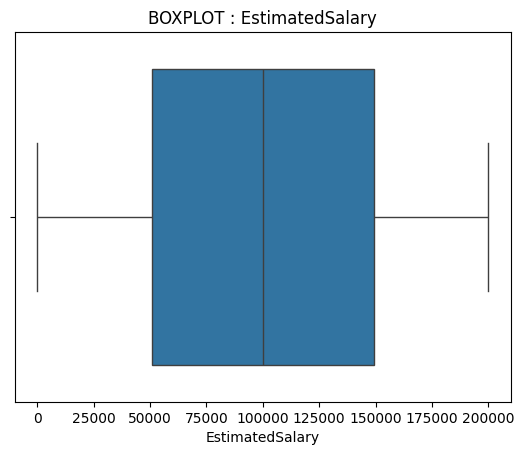

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
        985.]), array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
       8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
       1.5999630e+05, 1.7999439e+05, 1.9999248e+05]), <BarContainer object of 10 artists>)
Distribution of EstimatedSalary


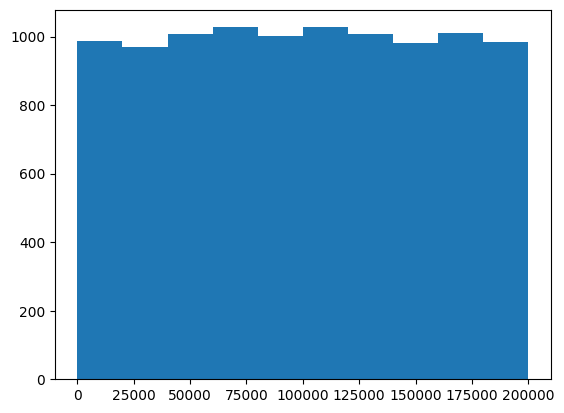

************************************************************
Age
Axes(0.125,0.11;0.775x0.77)


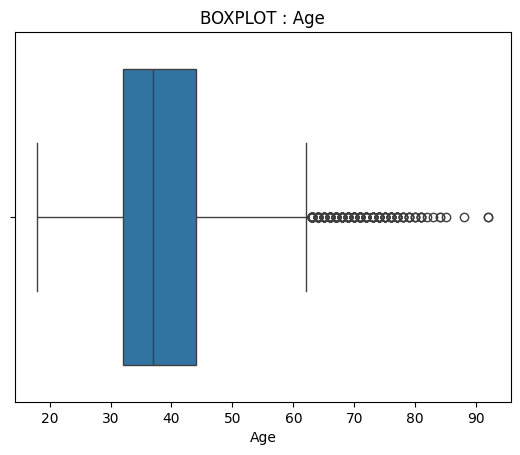

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
          4.]), array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]), <BarContainer object of 10 artists>)
Distribution of Age


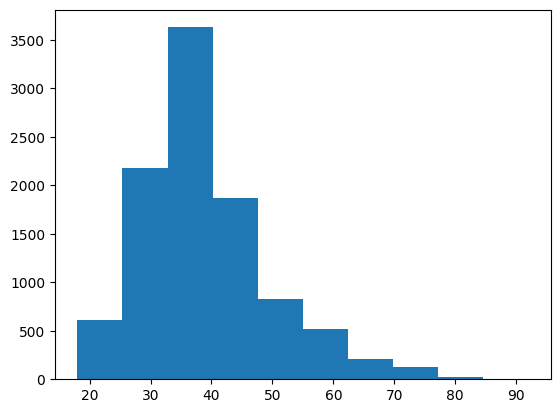

************************************************************
Balance
Axes(0.125,0.11;0.775x0.77)


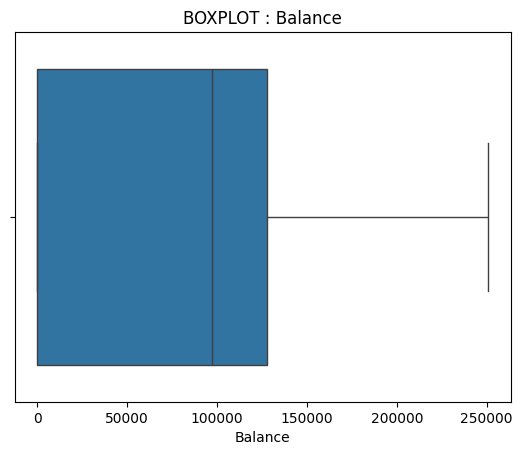

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
       7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]), array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
       125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
       250898.09 ]), <BarContainer object of 10 artists>)
Distribution of Balance


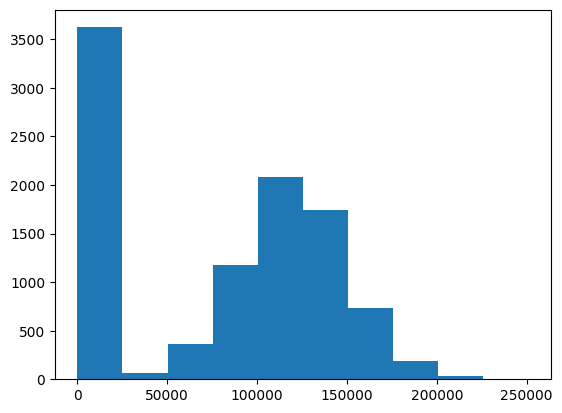

************************************************************


In [32]:
for i in num_cols:
 print(i)
 plt.title(f"BOXPLOT : {i}")
 print(sns.boxplot(df[i],orient='h'))
 plt.show()
 print(plt.hist(df[i],))
 print(f"Distribution of {i}")
 plt.show()
 print("*"*60)

box plot of Exited with  CreditScore


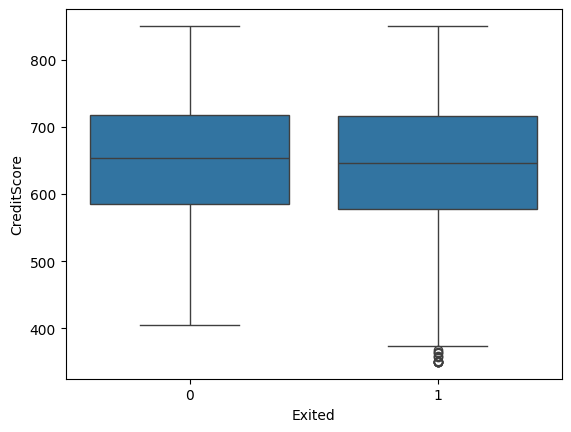

**************************************************
box plot of Exited with  EstimatedSalary


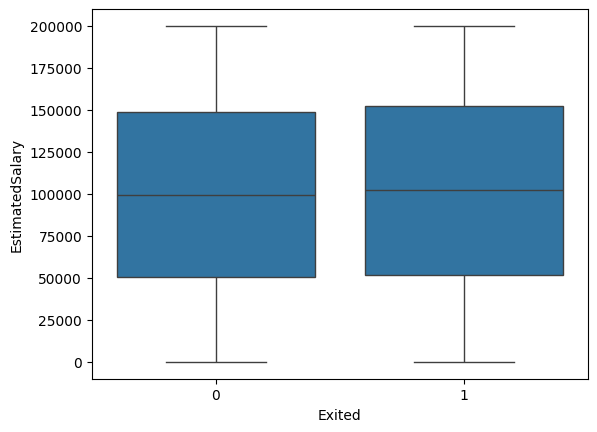

**************************************************
box plot of Exited with  Age


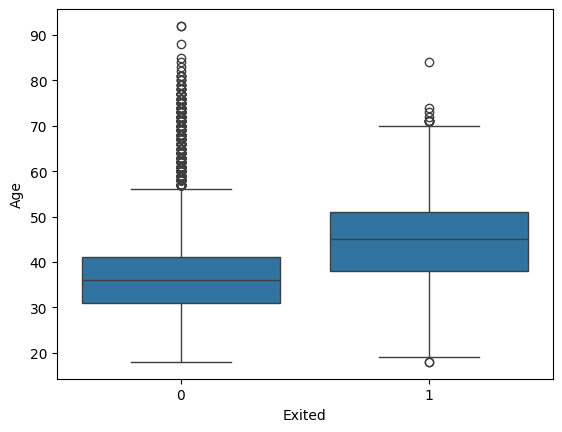

**************************************************
box plot of Exited with  Balance


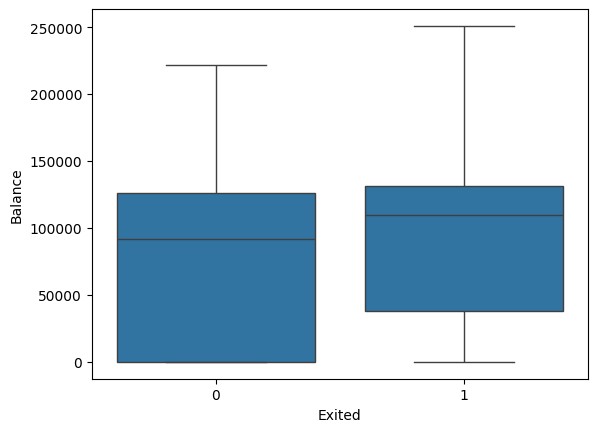

**************************************************


In [33]:
for i in num_cols:
 if i!='Exited':
  print(f"box plot of Exited with  {i}")
  sns.boxplot(x="Exited",y=i,data=df) 
  plt.show()
  print("*"*50)

<Axes: >

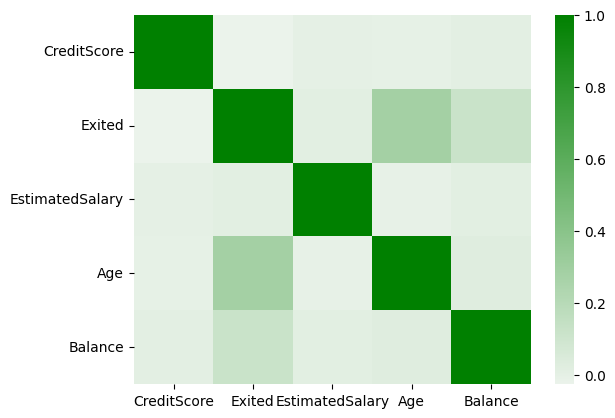

In [36]:
cmap = sns.light_palette('green',as_cmap=True)
sns.heatmap(df[num_cols].corr(),cmap=cmap)

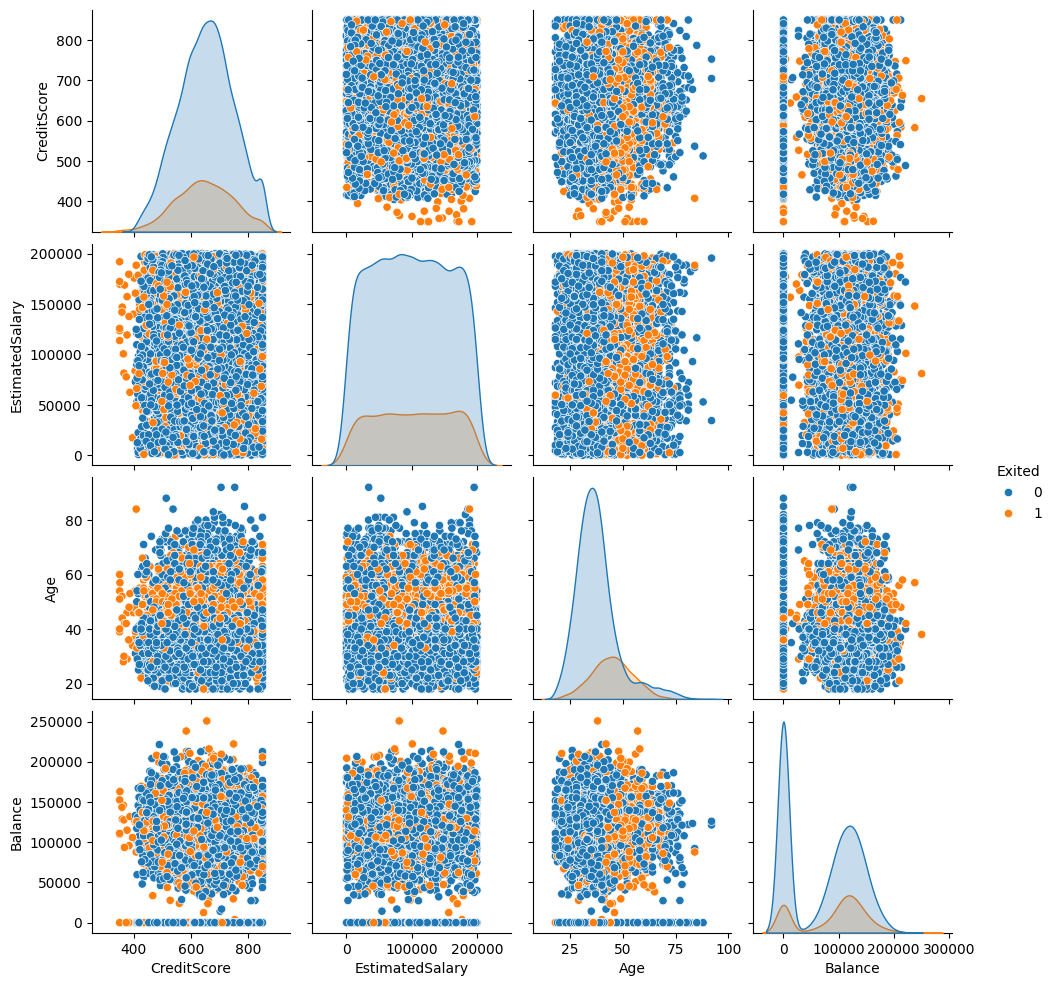

In [37]:
sns.pairplot(df[num_cols],hue='Exited')

NumOfProducts


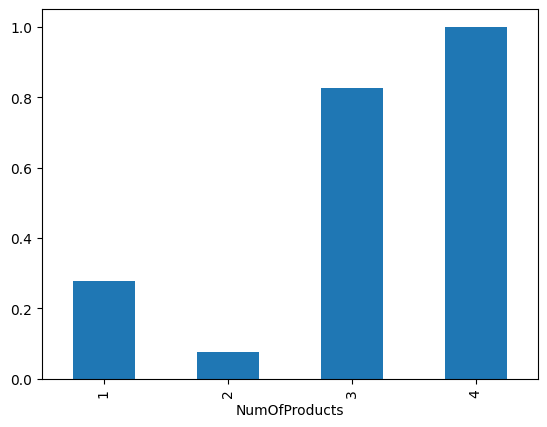

IsActiveMember


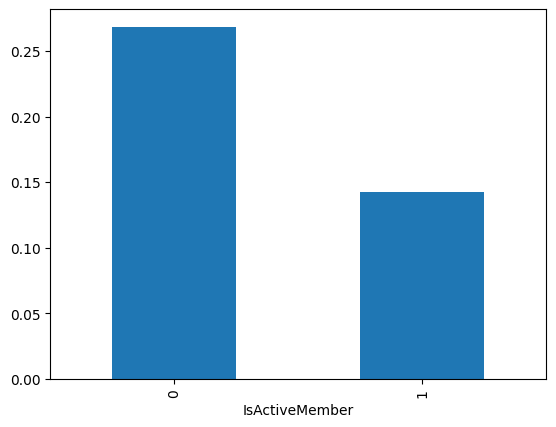

HasCrCard


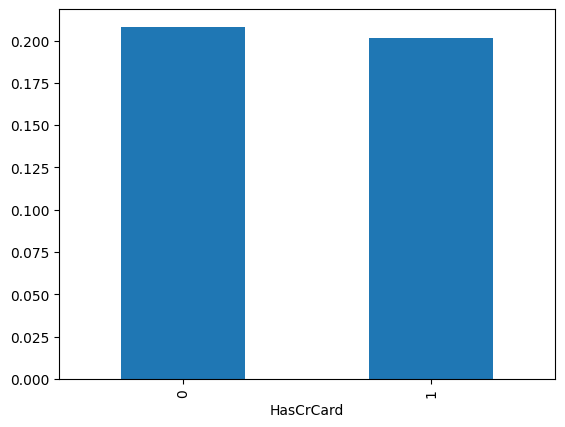

Gender


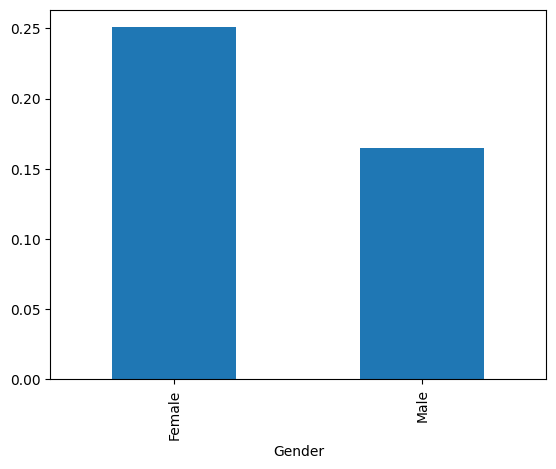

Geography


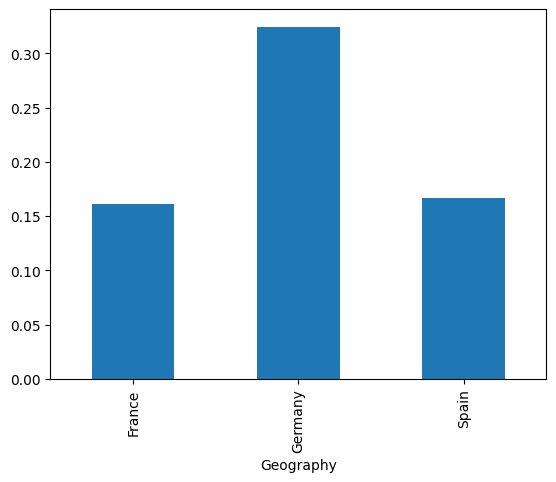

Tenure


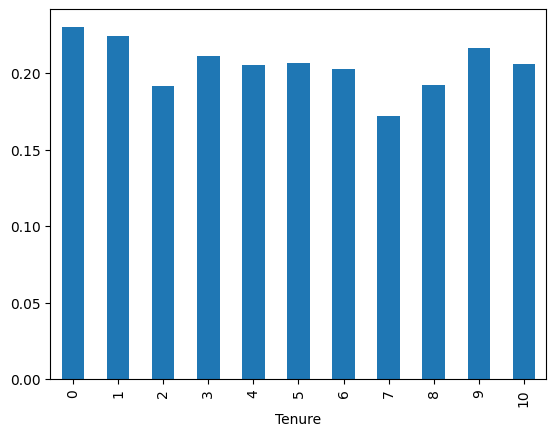

In [39]:
for i in cat_cols:
 print(i)
 df.groupby(i)['Exited'].mean().plot.bar()
 plt.show()